# Decision_Tree-Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
iris = pd.read_csv('iris.csv', index_col=0)
iris.head()

,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,,,,
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0


In [3]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 
iris.head()

,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,,,,
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0


In [4]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [5]:
x

,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,,,,
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
...,...,...,...,...
6.7,3.0,5.2,2.3,2
6.3,2.5,5.0,1.9,2
6.5,3.0,5.2,2.0,2


In [6]:
y

Sepal.Length
5.1    0
4.9    0
4.7    0
4.6    0
5.0    0
      ..
6.7    2
6.3    2
6.5    2
6.2    2
5.9    2
Name: Species, Length: 150, dtype: int64

In [7]:
iris['Species'].unique()

array([0, 1, 2], dtype=int64)

In [8]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [9]:
colnames = list(iris.columns)
colnames

['Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [10]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [11]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### Plot the decision tree

[Text(0.4, 0.8333333333333334, 'sepal width (cm) <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.5\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = virginica')]

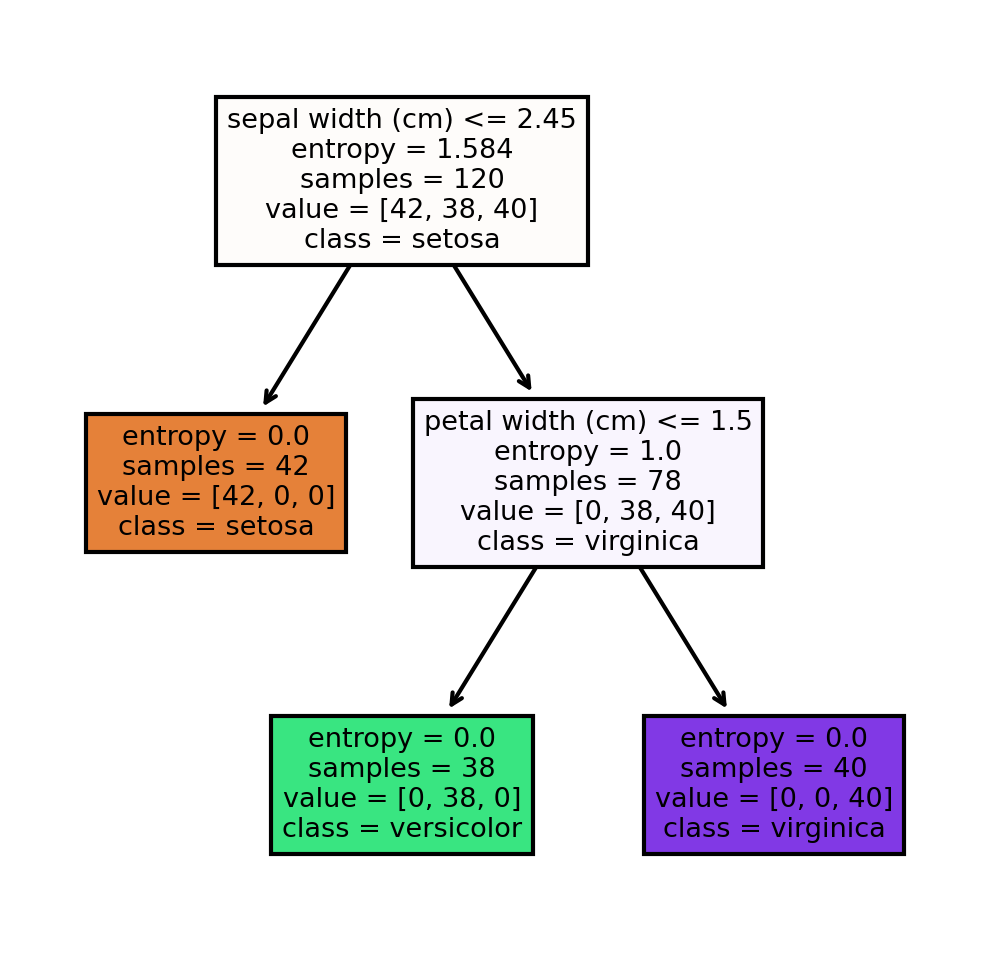

In [12]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [13]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    12
2    10
0     8
dtype: int64

In [14]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [15]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [16]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=5)

In [17]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [18]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.5\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = virginica')]

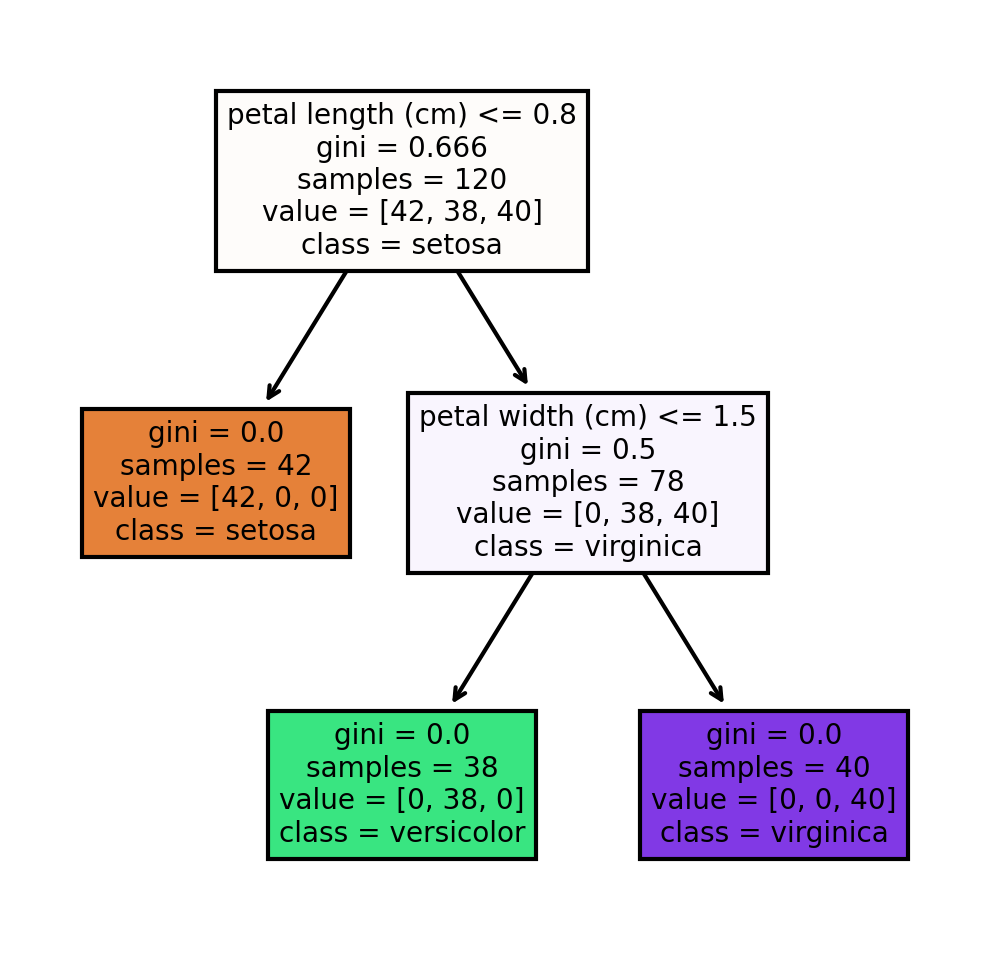

In [19]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)

#### Decision Tree Regression Example

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [23]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
#Find the accuracy
model.score(X_test,y_test)

0.9351070733290071